In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("advertising logistic.csv")

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


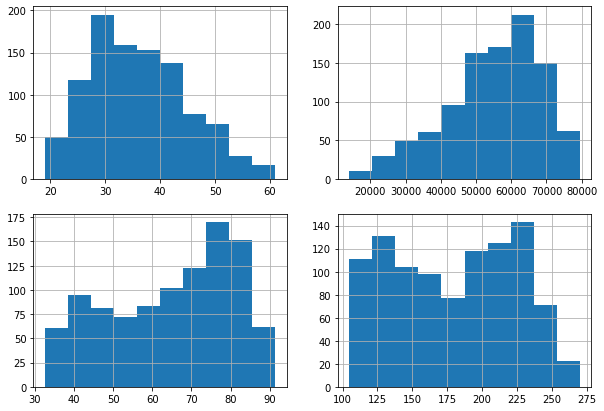

In [14]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(10,7))
data.Age.hist(ax=axes[0,0])
data['Area Income'].hist(ax=axes[0,1])
data['Daily Time Spent on Site'].hist(ax=axes[1,0])
data['Daily Internet Usage'].hist(ax=axes[1,1])

In [17]:
data.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [20]:
data['Country']=data.Country.astype('category').cat.codes

In [24]:
data['City']=data.City.astype('category').cat.codes

In [25]:
X=data.drop(['Timestamp','Clicked on Ad','Ad Topic Line'],axis=1)

In [26]:
y=data['Clicked on Ad']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [30]:
model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict=model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:',"\n",cm)

Confusion Matrix: 
 [[140   6]
 [ 25 129]]


In [37]:
acc=accuracy_score(y_test,y_predict)
print('Accuracy score:',"\n",acc)

Accuracy score: 
 0.8966666666666666


In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [39]:
p=precision_score(y_test,y_predict)
print("Precision","\n",p)

Precision 
 0.9555555555555556


In [40]:
r=recall_score(y_test,y_predict)
print("Recall","\n",r)

Recall 
 0.8376623376623377


In [41]:
f1=f1_score(y_test,y_predict)
print('F1 score',"\n",f1)

F1 score 
 0.8927335640138409


In [42]:
from sklearn.metrics import roc_curve

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_predict)

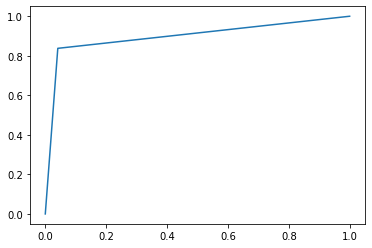

In [45]:
plt.plot(fpr,tpr)

# Logistic regression hyper parameter tunning

In [46]:
from sklearn.model_selection import GridSearchCV

In [49]:
penalty=["l1","l2"]
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
solver=['liblinear','saga']
param_grid=dict(penalty=penalty,C=c,solver=solver)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='roc_auc',verbose=1,n_jobs=-1,cv=10)
grid_result=grid.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   28.4s finished
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Prediction and evalution

In [50]:
y_pred=grid_result.predict(X_test)

In [53]:
def evaluate(test,pred):
    cm=confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    print('confusion_matrix',"\n",cm)
    print('accuracy_scor','\n',acc)
    print('precision',"\n",precision)
    print('recall','\n',recall)
evaluate(y_test,y_pred)

confusion_matrix 
 [[143   3]
 [  6 148]]
accuracy_scor 
 0.97
precision 
 0.9801324503311258
recall 
 0.961038961038961


In [54]:
df=pd.DataFrame()
df=X_test
df['actual']=y_test
df['pedicted']=y_pred

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
